# 시티랩스 모델데이터 만들기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from datetime import timedelta

## 주가, 시가총액: df_ct_pp

In [5]:
df_ct_pp = pd.read_csv('./data/NICE평가정보_시세추이.csv',encoding='cp949')
df_ct_pp
df_ct_pp['일자'] = pd.to_datetime(df_ct_pp['일자'])
df_ct_pp = df_ct_pp.sort_values(by='일자')
df_ct_pp

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
1474,2016-01-04,9870,-380,-3.71,10350,10350,9760,189459,1886036990,599255273400,60714820
1473,2016-01-05,9630,-240,-2.43,9760,9960,9530,341406,3300468740,584683716600,60714820
1472,2016-01-06,9300,-330,-3.43,9700,9700,9180,532616,4968210100,564647826000,60714820
1471,2016-01-07,9170,-130,-1.40,9170,9480,9100,373375,3450691720,556754899400,60714820
1470,2016-01-08,9180,10,0.11,9010,9250,8990,218901,1992796520,557362047600,60714820
...,...,...,...,...,...,...,...,...,...,...,...
4,2021-12-24,18700,350,1.91,18250,18700,18250,61998,1154205250,1135367134000,60714820
3,2021-12-27,18750,50,0.27,18600,18800,18350,85537,1596993300,1138402875000,60714820
2,2021-12-28,19150,400,2.13,18950,19150,18700,152762,2900395200,1162688803000,60714820
1,2021-12-29,18200,-950,-4.96,18900,18950,18150,197858,3636478450,1105009724000,60714820


In [6]:
df_ct_pp = df_ct_pp.set_index('일자')

In [7]:
df_ct_pp.reset_index(inplace=True)

In [8]:
df_ct_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      1475 non-null   datetime64[ns]
 1   종가      1475 non-null   int64         
 2   대비      1475 non-null   int64         
 3   등락률     1475 non-null   float64       
 4   시가      1475 non-null   int64         
 5   고가      1475 non-null   int64         
 6   저가      1475 non-null   int64         
 7   거래량     1475 non-null   int64         
 8   거래대금    1475 non-null   int64         
 9   시가총액    1475 non-null   int64         
 10  상장주식수   1475 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(9)
memory usage: 126.9 KB


## 재무비율

In [11]:
df_ct_hts = pd.read_csv('./data/NICE평가정보재무비율.csv',encoding='cp949',index_col=0).T
df_ct_hts = df_ct_hts.loc['2015/12':'2021/12']
df_ct_hts

,주가(원),매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),자본총계(억원),자본금(억원),부채비율(%),...,지배주주순이익률(%),ROA(%),ROE(%),EPS(원),BPS(원),DPS(원),PER(배),PBR(배),발행주식수,배당수익률(%)
2015/12,"10,250",830,19,13,13,"1,901",565,"1,336",304,42.24,...,1.54,2.71,3.84,21,"2,202",120,121.78,4.66,"60,715",1.17
2016/03,"9,120",837,93,75,75,"1,925",587,"1,338",304,43.84,...,8.90,15.58,22.29,123,"2,205",0,18.58,4.14,"60,715",0.00
2016/06,"6,890",921,141,108,108,"1,996",550,"1,446",304,38.05,...,11.72,22.02,31.02,178,"2,382",0,9.69,2.89,"60,715",0.00
2016/09,"8,120",847,96,72,72,"2,123",605,"1,518",304,39.88,...,8.45,13.90,19.32,118,"2,500",0,17.22,3.25,"60,715",0.00
2016/12,"6,930",851,62,29,29,"2,187",633,"1,553",304,40.78,...,3.42,5.40,7.58,48,"2,559",130,36.16,2.71,"60,715",1.88
2017/03,"7,750",883,110,86,86,"2,055",560,"1,495",304,37.48,...,9.70,16.15,22.47,141,"2,570",0,13.74,3.02,"60,715",0.00
2017/06,"8,110",959,149,114,114,"2,177",568,"1,609",304,35.28,...,11.93,21.64,29.50,189,"2,758",0,10.76,2.94,"60,715",0.00
2017/09,"8,250",888,91,76,76,"2,311",626,"1,685",304,37.16,...,8.50,13.47,18.35,124,"2,883",0,16.58,2.86,"60,715",0.00
2017/12,"8,690",874,76,31,31,"2,347",631,"1,715",304,36.81,...,3.56,5.34,7.32,51,"2,933",140,42.41,2.96,"60,715",1.61
2018/03,"9,750",932,126,99,99,"2,329",600,"1,730",304,34.67,...,10.59,16.89,22.93,163,"2,956",0,14.99,3.30,"60,715",0.00


In [12]:
df_ct_hts.iloc[:,:12] # 유보율 제거필요

# 수치데이터 

,주가(원),매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),자본총계(억원),자본금(억원),부채비율(%),유보율(%),영업이익률(%)
2015/12,"10,250",830,19,13,13,"1,901",565,"1,336",304,42.24,340.36,2.26
2016/03,"9,120",837,93,75,75,"1,925",587,"1,338",304,43.84,340.91,11.15
2016/06,"6,890",921,141,108,108,"1,996",550,"1,446",304,38.05,376.47,15.36
2016/09,"8,120",847,96,72,72,"2,123",605,"1,518",304,39.88,400.04,11.29
2016/12,"6,930",851,62,29,29,"2,187",633,"1,553",304,40.78,411.76,7.25
2017/03,"7,750",883,110,86,86,"2,055",560,"1,495",304,37.48,413.97,12.45
2017/06,"8,110",959,149,114,114,"2,177",568,"1,609",304,35.28,451.69,15.52
2017/09,"8,250",888,91,76,76,"2,311",626,"1,685",304,37.16,476.58,10.24
2017/12,"8,690",874,76,31,31,"2,347",631,"1,715",304,36.81,486.65,8.75
2018/03,"9,750",932,126,99,99,"2,329",600,"1,730",304,34.67,491.25,13.52


In [13]:
df_ct_hts.iloc[:,-10:] # DPS, 배당수익률 제거필요, PER 다시계산필요

,지배주주순이익률(%),ROA(%),ROE(%),EPS(원),BPS(원),DPS(원),PER(배),PBR(배),발행주식수,배당수익률(%)
2015/12,1.54,2.71,3.84,21,"2,202",120,121.78,4.66,"60,715",1.17
2016/03,8.90,15.58,22.29,123,"2,205",0,18.58,4.14,"60,715",0.00
2016/06,11.72,22.02,31.02,178,"2,382",0,9.69,2.89,"60,715",0.00
2016/09,8.45,13.90,19.32,118,"2,500",0,17.22,3.25,"60,715",0.00
2016/12,3.42,5.40,7.58,48,"2,559",130,36.16,2.71,"60,715",1.88
2017/03,9.70,16.15,22.47,141,"2,570",0,13.74,3.02,"60,715",0.00
2017/06,11.93,21.64,29.50,189,"2,758",0,10.76,2.94,"60,715",0.00
2017/09,8.50,13.47,18.35,124,"2,883",0,16.58,2.86,"60,715",0.00
2017/12,3.56,5.34,7.32,51,"2,933",140,42.41,2.96,"60,715",1.61
2018/03,10.59,16.89,22.93,163,"2,956",0,14.99,3.30,"60,715",0.00


In [14]:
# 인덱스 날짜로 바꿔주기

df_ct_hts = df_ct_hts.reset_index()
df_ct_hts = df_ct_hts.rename(columns={'index':'일자'})
df_ct_hts.head()

,일자,주가(원),매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),자본총계(억원),자본금(억원),...,지배주주순이익률(%),ROA(%),ROE(%),EPS(원),BPS(원),DPS(원),PER(배),PBR(배),발행주식수,배당수익률(%)
0,2015/12,"10,250",830,19,13,13,"1,901",565,"1,336",304,...,1.54,2.71,3.84,21,"2,202",120,121.78,4.66,"60,715",1.17
1,2016/03,"9,120",837,93,75,75,"1,925",587,"1,338",304,...,8.90,15.58,22.29,123,"2,205",0,18.58,4.14,"60,715",0.00
2,2016/06,"6,890",921,141,108,108,"1,996",550,"1,446",304,...,11.72,22.02,31.02,178,"2,382",0,9.69,2.89,"60,715",0.00
3,2016/09,"8,120",847,96,72,72,"2,123",605,"1,518",304,...,8.45,13.90,19.32,118,"2,500",0,17.22,3.25,"60,715",0.00
4,2016/12,"6,930",851,62,29,29,"2,187",633,"1,553",304,...,3.42,5.40,7.58,48,"2,559",130,36.16,2.71,"60,715",1.88


In [15]:
# 데이터타입 날짜형으로 바꿔주기
df_ct_hts['일자'] = pd.to_datetime(df_ct_hts['일자'])

In [16]:
# 데이터타입 숫자형으로 바꿔주기

for col in df_ct_hts.columns[1:]:
        df_ct_hts[col] = df_ct_hts[col].apply(lambda x: x.replace(',',''))
        df_ct_hts[col] = df_ct_hts[col].apply(pd.to_numeric)


In [17]:
df_ct_hts.head(3)

,일자,주가(원),매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),자본총계(억원),자본금(억원),...,지배주주순이익률(%),ROA(%),ROE(%),EPS(원),BPS(원),DPS(원),PER(배),PBR(배),발행주식수,배당수익률(%)
0,2015-12-01,10250,830,19,13,13,1901,565,1336,304,...,1.54,2.71,3.84,21,2202,120,121.78,4.66,60715,1.17
1,2016-03-01,9120,837,93,75,75,1925,587,1338,304,...,8.90,15.58,22.29,123,2205,0,18.58,4.14,60715,0.00
2,2016-06-01,6890,921,141,108,108,1996,550,1446,304,...,11.72,22.02,31.02,178,2382,0,9.69,2.89,60715,0.00


In [22]:
# 결산일 = 3,6,9,12월 마지막일

In [18]:
df_ct_hts['일자'] = df_ct_hts['일자'].apply(lambda x: x + timedelta(29)) 

In [19]:
df_ct_hts.head(10)

,일자,주가(원),매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),자본총계(억원),자본금(억원),...,지배주주순이익률(%),ROA(%),ROE(%),EPS(원),BPS(원),DPS(원),PER(배),PBR(배),발행주식수,배당수익률(%)
0,2015-12-30,10250,830,19,13,13,1901,565,1336,304,...,1.54,2.71,3.84,21,2202,120,121.78,4.66,60715,1.17
1,2016-03-30,9120,837,93,75,75,1925,587,1338,304,...,8.90,15.58,22.29,123,2205,0,18.58,4.14,60715,0.00
2,2016-06-30,6890,921,141,108,108,1996,550,1446,304,...,11.72,22.02,31.02,178,2382,0,9.69,2.89,60715,0.00
3,2016-09-30,8120,847,96,72,72,2123,605,1518,304,...,8.45,13.90,19.32,118,2500,0,17.22,3.25,60715,0.00
4,2016-12-30,6930,851,62,29,29,2187,633,1553,304,...,3.42,5.40,7.58,48,2559,130,36.16,2.71,60715,1.88
5,2017-03-30,7750,883,110,86,86,2055,560,1495,304,...,9.70,16.15,22.47,141,2570,0,13.74,3.02,60715,0.00
6,2017-06-30,8110,959,149,114,114,2177,568,1609,304,...,11.93,21.64,29.50,189,2758,0,10.76,2.94,60715,0.00
7,2017-09-30,8250,888,91,76,76,2311,626,1685,304,...,8.50,13.47,18.35,124,2883,0,16.58,2.86,60715,0.00
8,2017-12-30,8690,874,76,31,31,2347,631,1715,304,...,3.56,5.34,7.32,51,2933,140,42.41,2.96,60715,1.61
9,2018-03-30,9750,932,126,99,99,2329,600,1730,304,...,10.59,16.89,22.93,163,2956,0,14.99,3.30,60715,0.00


## 재무비율 날짜 전처리

In [20]:
# '2015-12-01' ~'2022-04-30' 날짜만
ser_date1 = pd.date_range('2015-12-30','2021-12-31')
df_date1 = pd.DataFrame({'일자': ser_date1})
df_date1[:5]

,일자
0,2015-12-30
1,2015-12-31
2,2016-01-01
3,2016-01-02
4,2016-01-03


In [21]:
# 일단 모든 날짜 채우기
df_ct_hts1 = pd.merge(df_date1, df_ct_hts, on='일자', how='left')
df_ct_hts1.head(10)

,일자,주가(원),매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),자본총계(억원),자본금(억원),...,지배주주순이익률(%),ROA(%),ROE(%),EPS(원),BPS(원),DPS(원),PER(배),PBR(배),발행주식수,배당수익률(%)
0,2015-12-30,10250.0,830.0,19.0,13.0,13.0,1901.0,565.0,1336.0,304.0,...,1.54,2.71,3.84,21.0,2202.0,120.0,121.78,4.66,60715.0,1.17
1,2015-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2016-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2016-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2016-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2016-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Nan값 의 데이터로 채우기: 발표된 데이터가 과거값

df_ct_hts1 = df_ct_hts1.fillna(method='bfill')
df_ct_hts1

,일자,주가(원),매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),자본총계(억원),자본금(억원),...,지배주주순이익률(%),ROA(%),ROE(%),EPS(원),BPS(원),DPS(원),PER(배),PBR(배),발행주식수,배당수익률(%)
0,2015-12-30,10250.0,830.0,19.0,13.0,13.0,1901.0,565.0,1336.0,304.0,...,1.54,2.71,3.84,21.0,2202.0,120.0,121.78,4.66,60715.0,1.17
1,2015-12-31,9120.0,837.0,93.0,75.0,75.0,1925.0,587.0,1338.0,304.0,...,8.90,15.58,22.29,123.0,2205.0,0.0,18.58,4.14,60715.0,0.00
2,2016-01-01,9120.0,837.0,93.0,75.0,75.0,1925.0,587.0,1338.0,304.0,...,8.90,15.58,22.29,123.0,2205.0,0.0,18.58,4.14,60715.0,0.00
3,2016-01-02,9120.0,837.0,93.0,75.0,75.0,1925.0,587.0,1338.0,304.0,...,8.90,15.58,22.29,123.0,2205.0,0.0,18.58,4.14,60715.0,0.00
4,2016-01-03,9120.0,837.0,93.0,75.0,75.0,1925.0,587.0,1338.0,304.0,...,8.90,15.58,22.29,123.0,2205.0,0.0,18.58,4.14,60715.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2189,2021-12-27,18000.0,1330.0,170.0,121.0,121.0,4343.0,1327.0,3015.0,304.0,...,9.08,11.76,16.43,199.0,5074.0,330.0,22.63,3.55,60715.0,1.83
2190,2021-12-28,18000.0,1330.0,170.0,121.0,121.0,4343.0,1327.0,3015.0,304.0,...,9.08,11.76,16.43,199.0,5074.0,330.0,22.63,3.55,60715.0,1.83
2191,2021-12-29,18000.0,1330.0,170.0,121.0,121.0,4343.0,1327.0,3015.0,304.0,...,9.08,11.76,16.43,199.0,5074.0,330.0,22.63,3.55,60715.0,1.83
2192,2021-12-30,18000.0,1330.0,170.0,121.0,121.0,4343.0,1327.0,3015.0,304.0,...,9.08,11.76,16.43,199.0,5074.0,330.0,22.63,3.55,60715.0,1.83


## 시가총액 데이터와 합치기

In [36]:
df_ct = pd.merge(df_ct_pp,df_ct_hts1, on='일자', how='left')
df_ct = df_ct.iloc[:1475]
df_ct

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,...,지배주주순이익률(%),ROA(%),ROE(%),EPS(원),BPS(원),DPS(원),PER(배),PBR(배),발행주식수,배당수익률(%)
0,2016-01-04,9870,-380,-3.71,10350,10350,9760,189459,1886036990,599255273400,...,8.90,15.58,22.29,123.0,2205.0,0.0,18.58,4.14,60715.0,0.00
1,2016-01-05,9630,-240,-2.43,9760,9960,9530,341406,3300468740,584683716600,...,8.90,15.58,22.29,123.0,2205.0,0.0,18.58,4.14,60715.0,0.00
2,2016-01-06,9300,-330,-3.43,9700,9700,9180,532616,4968210100,564647826000,...,8.90,15.58,22.29,123.0,2205.0,0.0,18.58,4.14,60715.0,0.00
3,2016-01-07,9170,-130,-1.40,9170,9480,9100,373375,3450691720,556754899400,...,8.90,15.58,22.29,123.0,2205.0,0.0,18.58,4.14,60715.0,0.00
4,2016-01-08,9180,10,0.11,9010,9250,8990,218901,1992796520,557362047600,...,8.90,15.58,22.29,123.0,2205.0,0.0,18.58,4.14,60715.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,2021-12-24,18700,350,1.91,18250,18700,18250,61998,1154205250,1135367134000,...,9.08,11.76,16.43,199.0,5074.0,330.0,22.63,3.55,60715.0,1.83
1471,2021-12-27,18750,50,0.27,18600,18800,18350,85537,1596993300,1138402875000,...,9.08,11.76,16.43,199.0,5074.0,330.0,22.63,3.55,60715.0,1.83
1472,2021-12-28,19150,400,2.13,18950,19150,18700,152762,2900395200,1162688803000,...,9.08,11.76,16.43,199.0,5074.0,330.0,22.63,3.55,60715.0,1.83
1473,2021-12-29,18200,-950,-4.96,18900,18950,18150,197858,3636478450,1105009724000,...,9.08,11.76,16.43,199.0,5074.0,330.0,22.63,3.55,60715.0,1.83


## 캔들차트 모양

In [37]:
# # 고가 - 종가
# df_ct['고가-종가'] = df_ct['고가'] - df_ct['종가']

# # 고가 - 시가
# df_ct['고가-시가'] = df_ct['고가'] - df_ct['시가']

# # 고가 - 저가
# df_ct['고가-저가'] = df_ct['고가'] - df_ct['저가']

# # 종가 - 시가
# df_ct['종가-시가'] = df_ct['종가'] - df_ct['시가']

# # 종가 - 저가
# df_ct['종가-저가'] = df_ct['종가'] - df_ct['저가']

# # 시가 - 저가
# df_ct['시가-저가'] = df_ct['시가'] - df_ct['저가']

## 안쓰는 열 빼기 : df_ct2 

In [38]:
df_ct.columns

Index(['일자', '종가', '대비', '등락률', '시가', '고가', '저가', '거래량', '거래대금', '시가총액',
       '상장주식수', '주가(원)', '매출액(억원)', '영업이익(억원)', '당기순이익(억원)', '지배주주순이익(억원)',
       '자산총계(억원)', '부채총계(억원)', '자본총계(억원)', '자본금(억원)', '부채비율(%)', '유보율(%)',
       '영업이익률(%)', '지배주주순이익률(%)', 'ROA(%)', 'ROE(%)', 'EPS(원)', 'BPS(원)',
       'DPS(원)', 'PER(배)', 'PBR(배)', '발행주식수', '배당수익률(%)'],
      dtype='object')

In [39]:
len(df_ct.columns)

33

In [40]:
df_ct1 = df_ct.drop(columns= ['대비','시가총액', '상장주식수', '주가(원)','발행주식수','DPS(원)','배당수익률(%)'])
df_ct1

,일자,종가,등락률,시가,고가,저가,거래량,거래대금,매출액(억원),영업이익(억원),...,부채비율(%),유보율(%),영업이익률(%),지배주주순이익률(%),ROA(%),ROE(%),EPS(원),BPS(원),PER(배),PBR(배)
0,2016-01-04,9870,-3.71,10350,10350,9760,189459,1886036990,837.0,93.0,...,43.84,340.91,11.15,8.90,15.58,22.29,123.0,2205.0,18.58,4.14
1,2016-01-05,9630,-2.43,9760,9960,9530,341406,3300468740,837.0,93.0,...,43.84,340.91,11.15,8.90,15.58,22.29,123.0,2205.0,18.58,4.14
2,2016-01-06,9300,-3.43,9700,9700,9180,532616,4968210100,837.0,93.0,...,43.84,340.91,11.15,8.90,15.58,22.29,123.0,2205.0,18.58,4.14
3,2016-01-07,9170,-1.40,9170,9480,9100,373375,3450691720,837.0,93.0,...,43.84,340.91,11.15,8.90,15.58,22.29,123.0,2205.0,18.58,4.14
4,2016-01-08,9180,0.11,9010,9250,8990,218901,1992796520,837.0,93.0,...,43.84,340.91,11.15,8.90,15.58,22.29,123.0,2205.0,18.58,4.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,2021-12-24,18700,1.91,18250,18700,18250,61998,1154205250,1330.0,170.0,...,44.02,914.90,12.80,9.08,11.76,16.43,199.0,5074.0,22.63,3.55
1471,2021-12-27,18750,0.27,18600,18800,18350,85537,1596993300,1330.0,170.0,...,44.02,914.90,12.80,9.08,11.76,16.43,199.0,5074.0,22.63,3.55
1472,2021-12-28,19150,2.13,18950,19150,18700,152762,2900395200,1330.0,170.0,...,44.02,914.90,12.80,9.08,11.76,16.43,199.0,5074.0,22.63,3.55
1473,2021-12-29,18200,-4.96,18900,18950,18150,197858,3636478450,1330.0,170.0,...,44.02,914.90,12.80,9.08,11.76,16.43,199.0,5074.0,22.63,3.55


In [41]:
df_ct2 = df_ct1.copy()

In [42]:
df_ct2.to_csv('./data/NICE평가정보_변동률전.csv')

## 변동률로 바꾸기

In [149]:
df_ct3 = pd.read_csv('./data/NICE평가정보_변동률전.csv',index_col=0)
df_ct3.head()

,일자,종가,등락률,시가,고가,저가,거래량,거래대금,매출액(억원),영업이익(억원),...,부채비율(%),유보율(%),영업이익률(%),지배주주순이익률(%),ROA(%),ROE(%),EPS(원),BPS(원),PER(배),PBR(배)
0,2016-01-04,9870,-3.71,10350,10350,9760,189459,1886036990,837.0,93.0,...,43.84,340.91,11.15,8.9,15.58,22.29,123.0,2205.0,18.58,4.14
1,2016-01-05,9630,-2.43,9760,9960,9530,341406,3300468740,837.0,93.0,...,43.84,340.91,11.15,8.9,15.58,22.29,123.0,2205.0,18.58,4.14
2,2016-01-06,9300,-3.43,9700,9700,9180,532616,4968210100,837.0,93.0,...,43.84,340.91,11.15,8.9,15.58,22.29,123.0,2205.0,18.58,4.14
3,2016-01-07,9170,-1.40,9170,9480,9100,373375,3450691720,837.0,93.0,...,43.84,340.91,11.15,8.9,15.58,22.29,123.0,2205.0,18.58,4.14
4,2016-01-08,9180,0.11,9010,9250,8990,218901,1992796520,837.0,93.0,...,43.84,340.91,11.15,8.9,15.58,22.29,123.0,2205.0,18.58,4.14


In [150]:
(df_ct3 == 0).sum()

일자              0
종가              0
등락률            80
시가              0
고가              0
저가              0
거래량             0
거래대금            0
매출액(억원)         0
영업이익(억원)        0
당기순이익(억원)       0
지배주주순이익(억원)     0
자산총계(억원)        0
부채총계(억원)        0
자본총계(억원)        0
자본금(억원)         0
부채비율(%)         0
유보율(%)          0
영업이익률(%)        0
지배주주순이익률(%)     0
ROA(%)          0
ROE(%)          0
EPS(원)          0
BPS(원)          0
PER(배)          0
PBR(배)          0
dtype: int64

### 변동률 적용하기

In [151]:
df_ct3.columns

Index(['일자', '종가', '등락률', '시가', '고가', '저가', '거래량', '거래대금', '매출액(억원)',
       '영업이익(억원)', '당기순이익(억원)', '지배주주순이익(억원)', '자산총계(억원)', '부채총계(억원)',
       '자본총계(억원)', '자본금(억원)', '부채비율(%)', '유보율(%)', '영업이익률(%)', '지배주주순이익률(%)',
       'ROA(%)', 'ROE(%)', 'EPS(원)', 'BPS(원)', 'PER(배)', 'PBR(배)'],
      dtype='object')

In [152]:
# 자본금은 304억으로 계속 같으므로 제외
df_ct4 = df_ct3[['일자','등락률', '종가','시가', '고가', '저가', '거래량', '거래대금', '매출액(억원)',
       '영업이익(억원)', '당기순이익(억원)', '지배주주순이익(억원)', '자산총계(억원)', '부채총계(억원)',
       '자본총계(억원)', 'EPS(원)', 'BPS(원)','부채비율(%)', '유보율(%)', '영업이익률(%)', '지배주주순이익률(%)',
       'ROA(%)', 'ROE(%)', 'PER(배)', 'PBR(배)']]

In [153]:
df_ct4.columns

Index(['일자', '등락률', '종가', '시가', '고가', '저가', '거래량', '거래대금', '매출액(억원)',
       '영업이익(억원)', '당기순이익(억원)', '지배주주순이익(억원)', '자산총계(억원)', '부채총계(억원)',
       '자본총계(억원)', 'EPS(원)', 'BPS(원)', '부채비율(%)', '유보율(%)', '영업이익률(%)',
       '지배주주순이익률(%)', 'ROA(%)', 'ROE(%)', 'PER(배)', 'PBR(배)'],
      dtype='object')

In [154]:
df_ct4.iloc[:,2:17]

,종가,시가,고가,저가,거래량,거래대금,매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),자본총계(억원),EPS(원),BPS(원)
0,9870,10350,10350,9760,189459,1886036990,837.0,93.0,75.0,75.0,1925.0,587.0,1338.0,123.0,2205.0
1,9630,9760,9960,9530,341406,3300468740,837.0,93.0,75.0,75.0,1925.0,587.0,1338.0,123.0,2205.0
2,9300,9700,9700,9180,532616,4968210100,837.0,93.0,75.0,75.0,1925.0,587.0,1338.0,123.0,2205.0
3,9170,9170,9480,9100,373375,3450691720,837.0,93.0,75.0,75.0,1925.0,587.0,1338.0,123.0,2205.0
4,9180,9010,9250,8990,218901,1992796520,837.0,93.0,75.0,75.0,1925.0,587.0,1338.0,123.0,2205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,18700,18250,18700,18250,61998,1154205250,1330.0,170.0,121.0,121.0,4343.0,1327.0,3015.0,199.0,5074.0
1471,18750,18600,18800,18350,85537,1596993300,1330.0,170.0,121.0,121.0,4343.0,1327.0,3015.0,199.0,5074.0
1472,19150,18950,19150,18700,152762,2900395200,1330.0,170.0,121.0,121.0,4343.0,1327.0,3015.0,199.0,5074.0
1473,18200,18900,18950,18150,197858,3636478450,1330.0,170.0,121.0,121.0,4343.0,1327.0,3015.0,199.0,5074.0


In [155]:
#변동률 변화
df_ct4.iloc[:,2:17] = df_ct4.iloc[:,2:17].pct_change()*100

C:\Users\bitcamp\anaconda3\lib\site-packages\pandas\core\indexing.py:1851: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [156]:
df_ct4

,일자,등락률,종가,시가,고가,저가,거래량,거래대금,매출액(억원),영업이익(억원),...,EPS(원),BPS(원),부채비율(%),유보율(%),영업이익률(%),지배주주순이익률(%),ROA(%),ROE(%),PER(배),PBR(배)
0,2016-01-04,-3.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,43.84,340.91,11.15,8.90,15.58,22.29,18.58,4.14
1,2016-01-05,-2.43,-2.431611,-5.700483,-3.768116,-2.356557,80.200466,74.994910,0.0,0.0,...,0.0,0.0,43.84,340.91,11.15,8.90,15.58,22.29,18.58,4.14
2,2016-01-06,-3.43,-3.426791,-0.614754,-2.610442,-3.672613,56.006631,50.530440,0.0,0.0,...,0.0,0.0,43.84,340.91,11.15,8.90,15.58,22.29,18.58,4.14
3,2016-01-07,-1.40,-1.397849,-5.463918,-2.268041,-0.871460,-29.897900,-30.544569,0.0,0.0,...,0.0,0.0,43.84,340.91,11.15,8.90,15.58,22.29,18.58,4.14
4,2016-01-08,0.11,0.109051,-1.744820,-2.426160,-1.208791,-41.372347,-42.249361,0.0,0.0,...,0.0,0.0,43.84,340.91,11.15,8.90,15.58,22.29,18.58,4.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,2021-12-24,1.91,1.907357,0.274725,1.630435,1.671309,-14.620946,-13.237035,0.0,0.0,...,0.0,0.0,44.02,914.90,12.80,9.08,11.76,16.43,22.63,3.55
1471,2021-12-27,0.27,0.267380,1.917808,0.534759,0.547945,37.967354,38.363025,0.0,0.0,...,0.0,0.0,44.02,914.90,12.80,9.08,11.76,16.43,22.63,3.55
1472,2021-12-28,2.13,2.133333,1.881720,1.861702,1.907357,78.591721,81.615990,0.0,0.0,...,0.0,0.0,44.02,914.90,12.80,9.08,11.76,16.43,22.63,3.55
1473,2021-12-29,-4.96,-4.960836,-0.263852,-1.044386,-2.941176,29.520430,25.378723,0.0,0.0,...,0.0,0.0,44.02,914.90,12.80,9.08,11.76,16.43,22.63,3.55


In [157]:
# 첫줄 제거
df_ct4 = df_ct4.drop(index=0)

In [158]:
fix_col = ['종가', '시가', '고가', '저가', '거래량', '거래대금', '매출액(억원)',
       '영업이익(억원)', '당기순이익(억원)', '지배주주순이익(억원)', '자산총계(억원)', '부채총계(억원)',
       '자본총계(억원)', 'EPS(원)', 'BPS(원)']

In [159]:
# 변동률 0값을 Nan값으로 바꾸고 앞의값으로 채워주기
for col in fix_col:
    df_ct4.loc[:,col] = df_ct4.loc[:,col].apply(lambda x: np.NaN if x==0 else x)
    df_ct4.loc[:,col] = df_ct4.loc[:,col].fillna(method= 'ffill')
    df_ct4.loc[:,col] = df_ct4.loc[:,col].fillna(method= 'bfill')
    

In [160]:
df_ct4

,일자,등락률,종가,시가,고가,저가,거래량,거래대금,매출액(억원),영업이익(억원),...,EPS(원),BPS(원),부채비율(%),유보율(%),영업이익률(%),지배주주순이익률(%),ROA(%),ROE(%),PER(배),PBR(배)
1,2016-01-05,-2.43,-2.431611,-5.700483,-3.768116,-2.356557,80.200466,74.994910,10.035842,51.612903,...,44.715447,8.027211,43.84,340.91,11.15,8.90,15.58,22.29,18.58,4.14
2,2016-01-06,-3.43,-3.426791,-0.614754,-2.610442,-3.672613,56.006631,50.530440,10.035842,51.612903,...,44.715447,8.027211,43.84,340.91,11.15,8.90,15.58,22.29,18.58,4.14
3,2016-01-07,-1.40,-1.397849,-5.463918,-2.268041,-0.871460,-29.897900,-30.544569,10.035842,51.612903,...,44.715447,8.027211,43.84,340.91,11.15,8.90,15.58,22.29,18.58,4.14
4,2016-01-08,0.11,0.109051,-1.744820,-2.426160,-1.208791,-41.372347,-42.249361,10.035842,51.612903,...,44.715447,8.027211,43.84,340.91,11.15,8.90,15.58,22.29,18.58,4.14
5,2016-01-11,-1.42,-1.416122,1.886792,-0.756757,0.111235,-48.695072,-48.848441,10.035842,51.612903,...,44.715447,8.027211,43.84,340.91,11.15,8.90,15.58,22.29,18.58,4.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,2021-12-24,1.91,1.907357,0.274725,1.630435,1.671309,-14.620946,-13.237035,18.327402,10.389610,...,0.505051,5.138831,44.02,914.90,12.80,9.08,11.76,16.43,22.63,3.55
1471,2021-12-27,0.27,0.267380,1.917808,0.534759,0.547945,37.967354,38.363025,18.327402,10.389610,...,0.505051,5.138831,44.02,914.90,12.80,9.08,11.76,16.43,22.63,3.55
1472,2021-12-28,2.13,2.133333,1.881720,1.861702,1.907357,78.591721,81.615990,18.327402,10.389610,...,0.505051,5.138831,44.02,914.90,12.80,9.08,11.76,16.43,22.63,3.55
1473,2021-12-29,-4.96,-4.960836,-0.263852,-1.044386,-2.941176,29.520430,25.378723,18.327402,10.389610,...,0.505051,5.138831,44.02,914.90,12.80,9.08,11.76,16.43,22.63,3.55


In [161]:
df_ct4.isnull().sum()

일자             0
등락률            0
종가             0
시가             0
고가             0
저가             0
거래량            0
거래대금           0
매출액(억원)        0
영업이익(억원)       0
당기순이익(억원)      0
지배주주순이익(억원)    0
자산총계(억원)       0
부채총계(억원)       0
자본총계(억원)       0
EPS(원)         0
BPS(원)         0
부채비율(%)        0
유보율(%)         0
영업이익률(%)       0
지배주주순이익률(%)    0
ROA(%)         0
ROE(%)         0
PER(배)         0
PBR(배)         0
dtype: int64

In [162]:
df_ct4.to_csv('./data/NICE평가정보_모델데이터1.csv')

# 시티랩스 모델구축

In [222]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [223]:
df_ct4 = pd.read_csv('./data/NICE평가정보_모델데이터1.csv',index_col=0)
df_ct4.head()

,일자,등락률,종가,시가,고가,저가,거래량,거래대금,매출액(억원),영업이익(억원),...,EPS(원),BPS(원),부채비율(%),유보율(%),영업이익률(%),지배주주순이익률(%),ROA(%),ROE(%),PER(배),PBR(배)
1,2016-01-05,-2.43,-2.431611,-5.700483,-3.768116,-2.356557,80.200466,74.994910,10.035842,51.612903,...,44.715447,8.027211,43.84,340.91,11.15,8.9,15.58,22.29,18.58,4.14
2,2016-01-06,-3.43,-3.426791,-0.614754,-2.610442,-3.672613,56.006631,50.530440,10.035842,51.612903,...,44.715447,8.027211,43.84,340.91,11.15,8.9,15.58,22.29,18.58,4.14
3,2016-01-07,-1.40,-1.397849,-5.463918,-2.268041,-0.871460,-29.897900,-30.544569,10.035842,51.612903,...,44.715447,8.027211,43.84,340.91,11.15,8.9,15.58,22.29,18.58,4.14
4,2016-01-08,0.11,0.109051,-1.744820,-2.426160,-1.208791,-41.372347,-42.249361,10.035842,51.612903,...,44.715447,8.027211,43.84,340.91,11.15,8.9,15.58,22.29,18.58,4.14
5,2016-01-11,-1.42,-1.416122,1.886792,-0.756757,0.111235,-48.695072,-48.848441,10.035842,51.612903,...,44.715447,8.027211,43.84,340.91,11.15,8.9,15.58,22.29,18.58,4.14


In [224]:
## 추가전처리
(df_ct4==np.inf).sum()

일자             0
등락률            0
종가             0
시가             0
고가             0
저가             0
거래량            0
거래대금           0
매출액(억원)        0
영업이익(억원)       0
당기순이익(억원)      0
지배주주순이익(억원)    0
자산총계(억원)       0
부채총계(억원)       0
자본총계(억원)       0
EPS(원)         0
BPS(원)         0
부채비율(%)        0
유보율(%)         0
영업이익률(%)       0
지배주주순이익률(%)    0
ROA(%)         0
ROE(%)         0
PER(배)         0
PBR(배)         0
dtype: int64

## X,Y값 설정

In [253]:
df_ct4.head(2)

,일자,등락률,종가,시가,고가,저가,거래량,거래대금,매출액(억원),영업이익(억원),...,EPS(원),BPS(원),부채비율(%),유보율(%),영업이익률(%),지배주주순이익률(%),ROA(%),ROE(%),PER(배),PBR(배)
1,2016-01-05,-2.43,-2.431611,-5.700483,-3.768116,-2.356557,80.200466,74.99491,10.035842,51.612903,...,44.715447,8.027211,43.84,340.91,11.15,8.9,15.58,22.29,18.58,4.14
2,2016-01-06,-3.43,-3.426791,-0.614754,-2.610442,-3.672613,56.006631,50.53044,10.035842,51.612903,...,44.715447,8.027211,43.84,340.91,11.15,8.9,15.58,22.29,18.58,4.14


## 30일 10일 4%

In [254]:
window_size = 30
target_period = 10

X = []
Y = []


for i in range(len(df_ct4) - window_size-target_period): 
    
    # 피쳐값 
    X.append([df_ct4.iloc[i+j,2:] for j in range(window_size)]) # j= 0부터 29 -> 30일치 데이터

    # 등락률 
    Y.append([df_ct4.iloc[window_size+i+j,1] for j in range(target_period)])
    
Y1 = []
for y in Y:
    toggle = 0
    for i in y:

        if i >= 4:
            Y1.append(1)
            toggle = 1
            break
    if toggle != 1:
        Y1.append(0)


In [255]:
X_ary = np.array(X).astype(float)
Y1_ary = np.array(Y1).astype(float)

In [256]:
X_ary.shape

(1434, 30, 23)

In [257]:
Y1_ary.shape

(1434,)

In [231]:
1444/5

288.8

In [258]:
train_test_split = 1100

x_train = X_ary[:1100]
y_train = Y1_ary[:1100]

x_test = X_ary[1100:]
y_test = Y1_ary[1100:]

## 모델구축

In [259]:
with tf.device('/GPU:0'):
    model = Sequential()
    model.add(LSTM(100, input_shape=(30,23)))
    model.add(Dense(1,activation='sigmoid'))
    model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 100)               49600     
                                                                 
 dense_14 (Dense)            (None, 1)                 101       
                                                                 
Total params: 49,701
Trainable params: 49,701
Non-trainable params: 0
_________________________________________________________________


In [260]:
# learning rate 설정
Adam = tf.keras.optimizers.Adam(learning_rate=0.001)

In [261]:
model.compile(loss='binary_crossentropy', metrics ='accuracy', optimizer=Adam)

In [262]:
hist = model.fit(x_train, y_train, epochs=50, batch_size= 10, validation_data= (x_test,y_test))

Epoch 1/50
110/110 [==============================] - 2s 8ms/step - loss: 0.6639 - accuracy: 0.6055 - val_loss: 0.7036 - val_accuracy: 0.4671
Epoch 2/50
110/110 [==============================] - 1s 6ms/step - loss: 0.6310 - accuracy: 0.6436 - val_loss: 0.7765 - val_accuracy: 0.4012
Epoch 3/50
110/110 [==============================] - 1s 6ms/step - loss: 0.6228 - accuracy: 0.6573 - val_loss: 0.7731 - val_accuracy: 0.3443
Epoch 4/50
110/110 [==============================] - 1s 6ms/step - loss: 0.6159 - accuracy: 0.6718 - val_loss: 0.7535 - val_accuracy: 0.3743
Epoch 5/50
110/110 [==============================] - 1s 6ms/step - loss: 0.6031 - accuracy: 0.6900 - val_loss: 0.7697 - val_accuracy: 0.4072
Epoch 6/50
110/110 [==============================] - 1s 6ms/step - loss: 0.5948 - accuracy: 0.6845 - val_loss: 0.7704 - val_accuracy: 0.3862
Epoch 7/50
110/110 [==============================] - 1s 6ms/step - loss: 0.5943 - accuracy: 0.6955 - val_loss: 0.7886 - val_accuracy: 0.3952
Epoch 

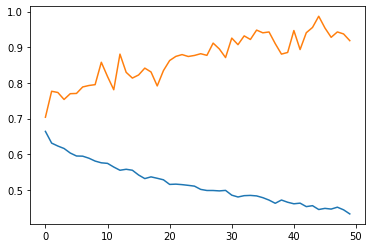

In [263]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

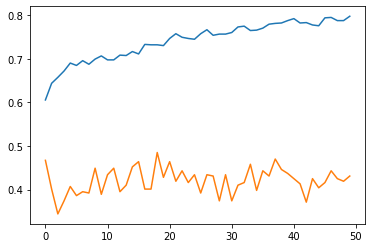

In [264]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

In [265]:
model.evaluate(x_test, y_test)

11/11 [==============================] - 0s 4ms/step - loss: 0.9185 - accuracy: 0.4311


[0.9185487627983093, 0.43113771080970764]

In [179]:
y_test

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1.

## 10일 10일

In [266]:
window_size = 10
target_period = 10

X = []
Y = []


for i in range(len(df_ct4) - window_size-target_period): 
    
    # 피쳐값 
    X.append([df_ct4.iloc[i+j,2:] for j in range(window_size)]) # j= 0부터 29 -> 30일치 데이터

    # 등락률 
    Y.append([df_ct4.iloc[window_size+i+j,1] for j in range(target_period)])
    
Y1 = []
for y in Y:
    toggle = 0
    for i in y:

        if i >= 4:
            Y1.append(1)
            toggle = 1
            break
    if toggle != 1:
        Y1.append(0)


In [267]:
X_ary = np.array(X).astype(float)
Y1_ary = np.array(Y1).astype(float)
X_ary.shape

(1454, 10, 23)

In [268]:
train_test_split = 1100

x_train = X_ary[:1100]
y_train = Y1_ary[:1100]

x_test = X_ary[1100:]
y_test = Y1_ary[1100:]

In [269]:
with tf.device('/GPU:0'):
    model2 = Sequential()
    model2.add(LSTM(100, input_shape=(10,23)))
    model2.add(Dense(1,activation='sigmoid'))
    model2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 100)               49600     
                                                                 
 dense_15 (Dense)            (None, 1)                 101       
                                                                 
Total params: 49,701
Trainable params: 49,701
Non-trainable params: 0
_________________________________________________________________


In [270]:
# learning rate 설정
Adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model2.compile(loss='binary_crossentropy', metrics ='accuracy', optimizer=Adam)

In [271]:
hist2 = model2.fit(x_train, y_train, epochs=50, batch_size= 10, validation_data= (x_test,y_test))

Epoch 1/50
110/110 [==============================] - 2s 8ms/step - loss: 0.7148 - accuracy: 0.4745 - val_loss: 0.7137 - val_accuracy: 0.4718
Epoch 2/50
110/110 [==============================] - 1s 5ms/step - loss: 0.6617 - accuracy: 0.6200 - val_loss: 0.7113 - val_accuracy: 0.4266
Epoch 3/50
110/110 [==============================] - 1s 5ms/step - loss: 0.6391 - accuracy: 0.6491 - val_loss: 0.7134 - val_accuracy: 0.4576
Epoch 4/50
110/110 [==============================] - 1s 5ms/step - loss: 0.6273 - accuracy: 0.6591 - val_loss: 0.7205 - val_accuracy: 0.4435
Epoch 5/50
110/110 [==============================] - 1s 5ms/step - loss: 0.6203 - accuracy: 0.6664 - val_loss: 0.7223 - val_accuracy: 0.4492
Epoch 6/50
110/110 [==============================] - 1s 5ms/step - loss: 0.6135 - accuracy: 0.6855 - val_loss: 0.7236 - val_accuracy: 0.4350
Epoch 7/50
110/110 [==============================] - 1s 5ms/step - loss: 0.6073 - accuracy: 0.6927 - val_loss: 0.7247 - val_accuracy: 0.4322
Epoch 

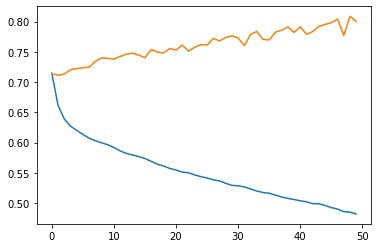

In [272]:
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])

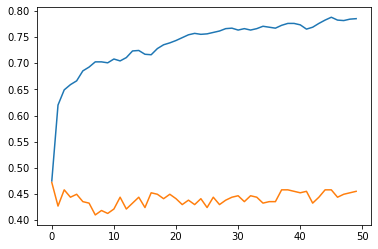

In [273]:
plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])

In [274]:
model2.evaluate(x_test, y_test)

12/12 [==============================] - 0s 3ms/step - loss: 0.8004 - accuracy: 0.4548


[0.8003724813461304, 0.4548022747039795]

## 10일 10일

In [247]:
window_size = 10
target_period = 10

X = []
Y = []


for i in range(len(df_ct4) - window_size-target_period): 
    
    # 피쳐값 
    X.append([df_ct4.iloc[i+j,2:] for j in range(window_size)]) # j= 0부터 29 -> 30일치 데이터

    # 등락률 
    Y.append([df_ct4.iloc[window_size+i+j,1] for j in range(target_period)])
    
Y1 = []
for y in Y:
    toggle = 0
    for i in y:

        if i >= 4:
            Y1.append(1)
            toggle = 1
            break
    if toggle != 1:
        Y1.append(0)


In [248]:
X_ary = np.array(X).astype(float)
Y1_ary = np.array(Y1).astype(float)
X_ary.shape

(1444, 20, 23)

In [249]:
train_test_split = 1100

x_train = X_ary[:1100]
y_train = Y1_ary[:1100]

x_test = X_ary[1100:]
y_test = Y1_ary[1100:]

In [250]:
with tf.device('/GPU:0'):
    model3 = Sequential()
    model3.add(LSTM(100, input_shape=(10,23)))
    model3.add(Dense(1,activation='sigmoid'))
    model3.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 100)               49600     
                                                                 
 dense_13 (Dense)            (None, 1)                 101       
                                                                 
Total params: 49,701
Trainable params: 49,701
Non-trainable params: 0
_________________________________________________________________


In [251]:
# learning rate 설정
Adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model3.compile(loss='binary_crossentropy', metrics ='accuracy', optimizer=Adam)

In [252]:
hist3 = model3.fit(x_train, y_train, epochs=100, batch_size= 10, validation_data= (x_test,y_test))

Epoch 1/100
110/110 [==============================] - 2s 8ms/step - loss: 0.7146 - accuracy: 0.5055 - val_loss: 0.6997 - val_accuracy: 0.5756
Epoch 2/100
110/110 [==============================] - 1s 6ms/step - loss: 0.6641 - accuracy: 0.5727 - val_loss: 0.7055 - val_accuracy: 0.5058
Epoch 3/100
110/110 [==============================] - 1s 6ms/step - loss: 0.6380 - accuracy: 0.6300 - val_loss: 0.7056 - val_accuracy: 0.4709
Epoch 4/100
110/110 [==============================] - 1s 6ms/step - loss: 0.6230 - accuracy: 0.6682 - val_loss: 0.7079 - val_accuracy: 0.4535
Epoch 5/100
110/110 [==============================] - 1s 5ms/step - loss: 0.6164 - accuracy: 0.6764 - val_loss: 0.7088 - val_accuracy: 0.4564
Epoch 6/100
110/110 [==============================] - 1s 5ms/step - loss: 0.6110 - accuracy: 0.6827 - val_loss: 0.7123 - val_accuracy: 0.4593
Epoch 7/100
110/110 [==============================] - 1s 5ms/step - loss: 0.6070 - accuracy: 0.6755 - val_loss: 0.7119 - val_accuracy: 0.4535

Epoch 58/100
110/110 [==============================] - 1s 5ms/step - loss: 0.4578 - accuracy: 0.8155 - val_loss: 0.8333 - val_accuracy: 0.4273
Epoch 59/100
110/110 [==============================] - 1s 6ms/step - loss: 0.4556 - accuracy: 0.8136 - val_loss: 0.8285 - val_accuracy: 0.4244
Epoch 60/100
110/110 [==============================] - 1s 6ms/step - loss: 0.4551 - accuracy: 0.8127 - val_loss: 0.8382 - val_accuracy: 0.4215
Epoch 61/100
110/110 [==============================] - 1s 6ms/step - loss: 0.4521 - accuracy: 0.8227 - val_loss: 0.8405 - val_accuracy: 0.4215
Epoch 62/100
110/110 [==============================] - 1s 5ms/step - loss: 0.4484 - accuracy: 0.8127 - val_loss: 0.8381 - val_accuracy: 0.4273
Epoch 63/100
110/110 [==============================] - 1s 5ms/step - loss: 0.4485 - accuracy: 0.8127 - val_loss: 0.8361 - val_accuracy: 0.4244
Epoch 64/100
110/110 [==============================] - 1s 5ms/step - loss: 0.4422 - accuracy: 0.8209 - val_loss: 0.8392 - val_accuracy: